In [1]:
import pandas as pd
import numpy as np

In [2]:
# read file into pandas using a relative path
df = pd.read_csv("/Users/souvikchakraborty/Downloads/spam.csv" , encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

steps
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Heroku Deployment

# 1. Data Cleaning

In [4]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['label'] = encoder.fit_transform(df['label'])

In [7]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
#duplicate values
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

# 2.EDA

In [12]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

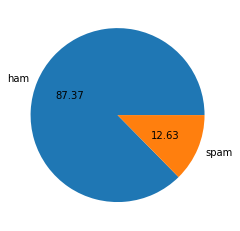

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [15]:
#Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/souvikchakraborty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_char']=df['message'].apply(len)

In [19]:
df.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#number of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
 df['num_sent'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,label,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df['label']==0][["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

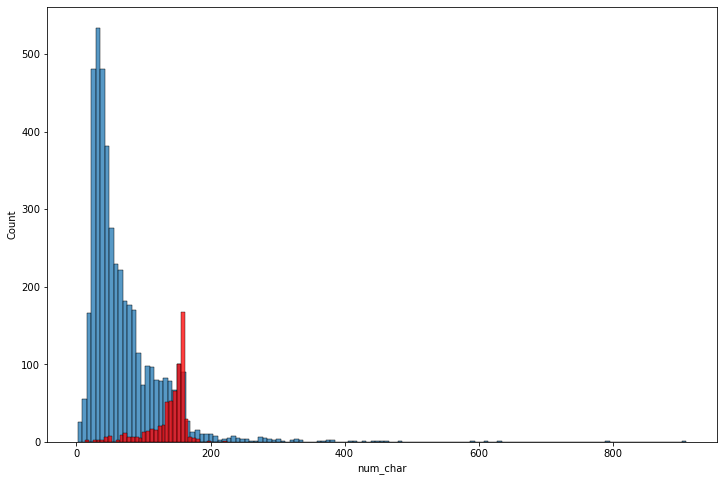

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

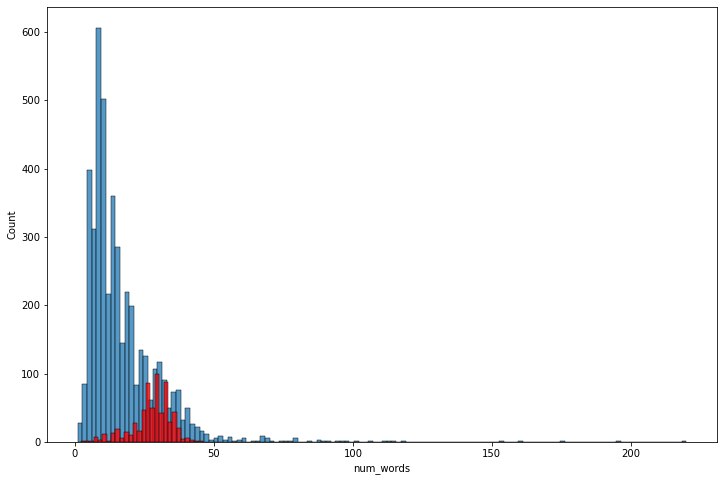

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')

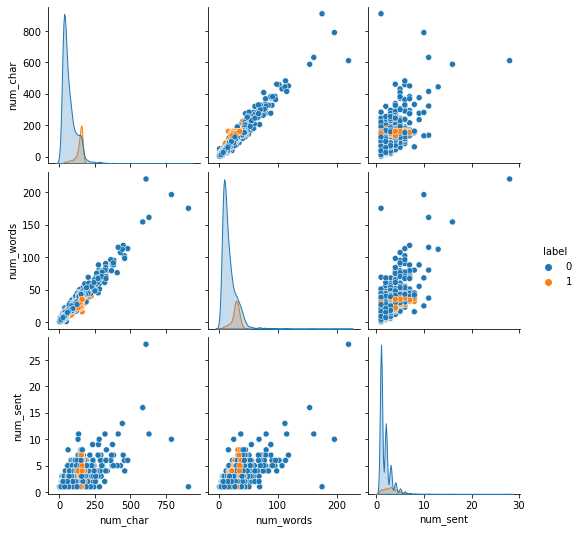

In [29]:
sns.pairplot(df, hue='label')

<AxesSubplot:>

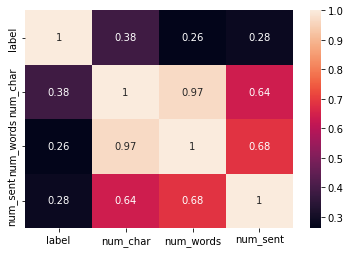

In [30]:
sns.heatmap(df.corr(), annot=True)


# Text Preprocessing

- Lower Case
- Tokenization
- Removing special characters
- Removing Stop Words and punctuation
- Stemming

In [31]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
# stopwords.words('english')

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
      
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [33]:
transform_text('Hi How are you dancing Shyam 20&?')

'hi danc shyam 20'

In [34]:
df['transformed_text'] = df['message'].apply(transform_text)
df.head()

,label,message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [36]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

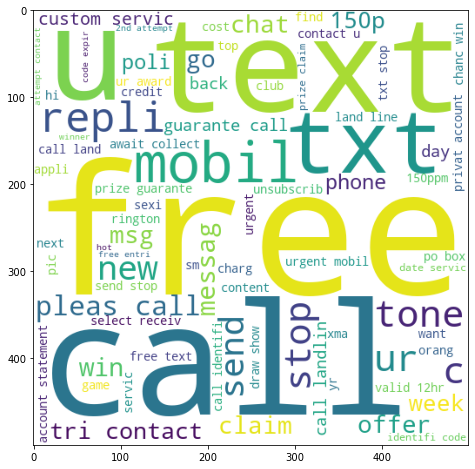

In [37]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

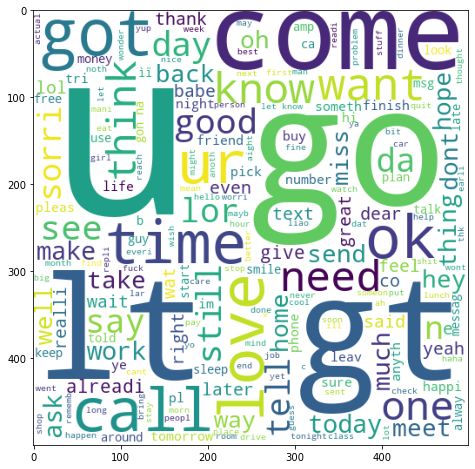

In [38]:
spam_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [39]:
df.head()

,label,message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


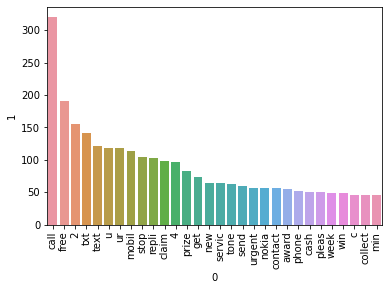

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
ham_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35394

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


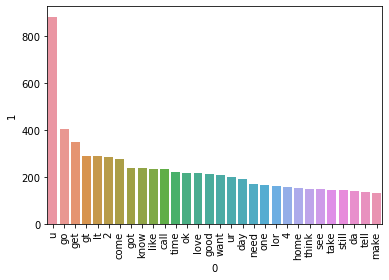

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [84]:
X.shape

(5169, 3000)

In [85]:
y = df['label'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [91]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [92]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [93]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf -> MNB

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [95]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [96]:
clfs = {
    
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [97]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [98]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [99]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [105]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Accuracy', ascending=False)

In [106]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.974855,0.982759
8,ETC,0.974855,0.974576
10,xgb,0.971954,0.943089
2,NB,0.970986,1.000000
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
7,BgC,0.957447,0.867188
9,GBDT,0.947776,0.920000
3,DT,0.930368,0.817308


In [102]:
performance_df1 = pd.melt(performance_df, id_vars= 'Algorithm')

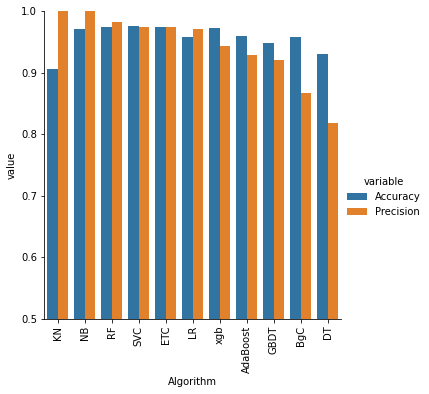

In [103]:
sns.catplot(x = "Algorithm", y = 'value',
           hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [107]:
#Using MultinomialNB 